In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [2]:
train.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [3]:
test.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
0,1028232,146,55,1885,158.11,159.11,0,0
1,1127204,146,55,1993,160.11,159.11,0,0
2,1212707,146,55,2539,157.14,159.14,0,0
3,1082698,146,55,2631,162.02,162.02,0,0
4,1400926,146,55,1248,163.93,163.93,0,0


## Checking for null values

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 31.3 MB


In [5]:
train.isnull().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
dtype: int64

In [6]:
train['num_orders'].describe()

count    456548.000000
mean        261.872760
std         395.922798
min          13.000000
25%          54.000000
50%         136.000000
75%         324.000000
max       24299.000000
Name: num_orders, dtype: float64

In [7]:
meal_info = pd.read_csv("meal_info.csv")
center_info = pd.read_csv("fulfilment_center_info.csv")

# Data Visualization

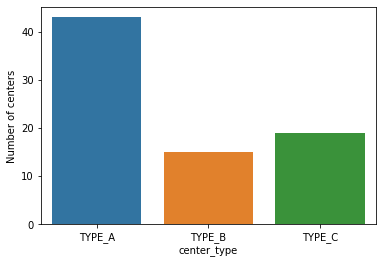

In [8]:
ax = sns.countplot(center_info['center_type'])
ax.set(ylabel='Number of centers')
plt.show()

In [9]:
print("Total Number of cities: ", center_info['city_code'].nunique())
print("Total number of regions: ", center_info['region_code'].nunique())

Total Number of cities:  51
Total number of regions:  8


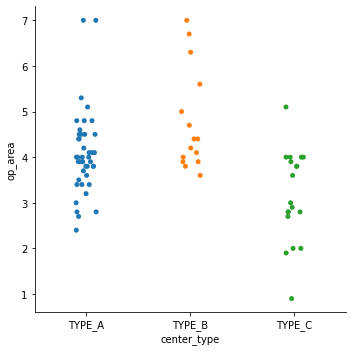

In [10]:
sns.catplot(x = 'center_type', y = 'op_area', data=center_info)
plt.show()

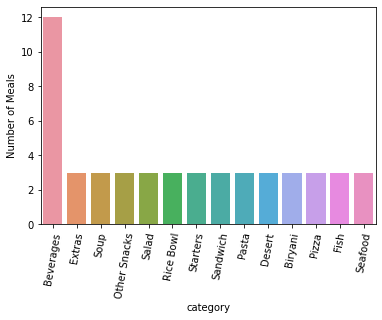

In [11]:
ax = sns.countplot(meal_info['category'])
ax.set(ylabel= "Number of Meals")
plt.xticks(rotation=80)
plt.show()

In [12]:
print("Total number of different types of meal: ", meal_info['meal_id'].nunique())

Total number of different types of meal:  51


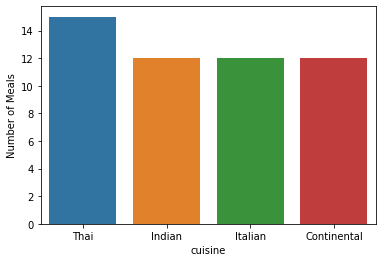

In [13]:
ax = sns.countplot(meal_info['cuisine'])
ax.set(ylabel= "Number of Meals")
plt.show()

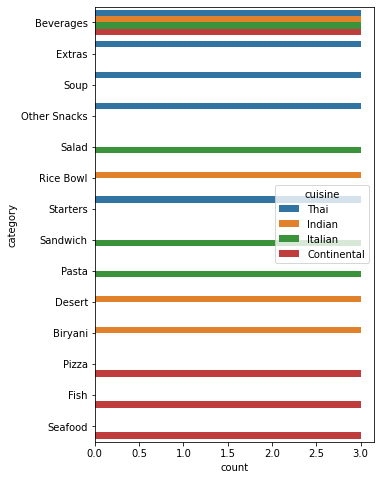

In [14]:
fig, ax = plt.subplots(figsize=(5,8))
sns.countplot(y = meal_info['category'], hue=meal_info['cuisine'], ax=ax)
plt.show()

Emailer for Promotion Distribution:
 0    419498
1     37050
Name: emailer_for_promotion, dtype: int64


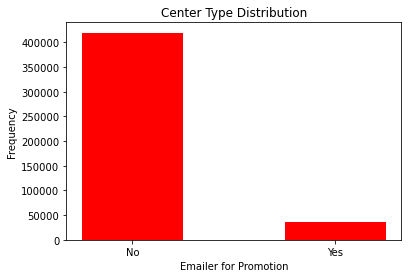

In [15]:
plt.bar(train['emailer_for_promotion'].value_counts().index, train['emailer_for_promotion'].value_counts(), width=0.5, bottom=None, align='center', data=train, color='r')
plt.title('Center Type Distribution')
plt.xticks(np.arange(2), ('No', 'Yes'))
plt.xlabel('Emailer for Promotion')
plt.ylabel('Frequency')
print('Emailer for Promotion Distribution:\n',train['emailer_for_promotion'].value_counts())

Homepage Featured Distribution:
 0    406693
1     49855
Name: homepage_featured, dtype: int64


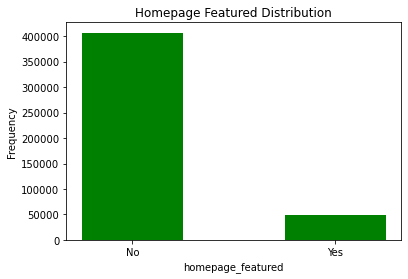

In [16]:
plt.bar(train['homepage_featured'].value_counts().index, train['homepage_featured'].value_counts(), width=0.5, bottom=None, align='center', data=train, color='g')
plt.title('Homepage Featured Distribution')
plt.xticks(np.arange(2), ('No', 'Yes'))
plt.xlabel('homepage_featured')
plt.ylabel('Frequency')
print('Homepage Featured Distribution:\n',train['homepage_featured'].value_counts())

Text(0, 0.5, 'Number of Items')

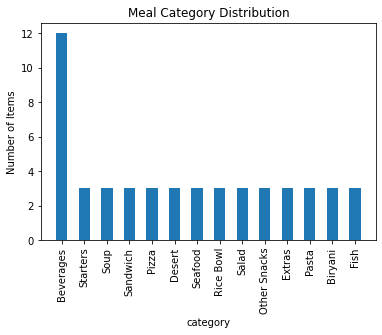

In [17]:
plt.bar(meal_info['category'].value_counts().index, meal_info['category'].value_counts(), width=0.5, bottom=None, align='center', data=meal_info)
plt.title('Meal Category Distribution')
plt.xticks(rotation='vertical')
plt.xlabel('category')
plt.ylabel('Number of Items')

## We add the above csv files to the train table

In [18]:
trainfinal = pd.merge(train, meal_info, on="meal_id", how="outer")
trainfinal = pd.merge(trainfinal, center_info, on="center_id", how="outer")
trainfinal.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1379560,1,55,1885,136.83,152.29,0,0,177,Beverages,Thai,647,56,TYPE_C,2.0
1,1018704,2,55,1885,135.83,152.29,0,0,323,Beverages,Thai,647,56,TYPE_C,2.0
2,1196273,3,55,1885,132.92,133.92,0,0,96,Beverages,Thai,647,56,TYPE_C,2.0
3,1116527,4,55,1885,135.86,134.86,0,0,163,Beverages,Thai,647,56,TYPE_C,2.0
4,1343872,5,55,1885,146.50,147.50,0,0,215,Beverages,Thai,647,56,TYPE_C,2.0


Text(0, 0.5, 'Number of orders')

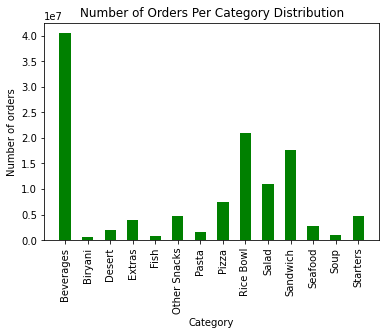

In [19]:
plt.bar(meal_info.groupby( [ "category"] ).sum().index,trainfinal.groupby( [ "category"] )['num_orders'].sum(), width=0.5, bottom=None, align='center', data=trainfinal, color='g')
plt.title('Number of Orders Per Category Distribution')
plt.xticks(rotation='vertical')
plt.xlabel('Category')
plt.ylabel('Number of orders')

## Now we drop the columns center_id and meal_id

In [20]:
trainfinal = trainfinal.drop(['center_id', 'meal_id'], axis=1)
trainfinal.head()

,id,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1379560,1,136.83,152.29,0,0,177,Beverages,Thai,647,56,TYPE_C,2.0
1,1018704,2,135.83,152.29,0,0,323,Beverages,Thai,647,56,TYPE_C,2.0
2,1196273,3,132.92,133.92,0,0,96,Beverages,Thai,647,56,TYPE_C,2.0
3,1116527,4,135.86,134.86,0,0,163,Beverages,Thai,647,56,TYPE_C,2.0
4,1343872,5,146.50,147.50,0,0,215,Beverages,Thai,647,56,TYPE_C,2.0


In [21]:
trainfinal.tail()

,id,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
456543,1437396,141,583.03,630.53,0,1,13,Fish,Continental,473,77,TYPE_A,4.5
456544,1060716,142,581.03,582.03,0,0,42,Fish,Continental,473,77,TYPE_A,4.5
456545,1029231,143,583.03,581.03,0,0,40,Fish,Continental,473,77,TYPE_A,4.5
456546,1141147,144,582.03,581.03,0,0,53,Fish,Continental,473,77,TYPE_A,4.5
456547,1443704,145,581.03,582.03,0,0,27,Fish,Continental,473,77,TYPE_A,4.5


## We will create a list of all the columns of trainfinal 

In [22]:
cols = trainfinal.columns.tolist()
print(cols)

['id', 'week', 'checkout_price', 'base_price', 'emailer_for_promotion', 'homepage_featured', 'num_orders', 'category', 'cuisine', 'city_code', 'region_code', 'center_type', 'op_area']


## We interchange the position of the table so that the details and meal and center will be after the week column

In [23]:
cols = cols[:2] + cols[9:] + cols[7:9] + cols[2:7]
print(cols)


['id', 'week', 'city_code', 'region_code', 'center_type', 'op_area', 'category', 'cuisine', 'checkout_price', 'base_price', 'emailer_for_promotion', 'homepage_featured', 'num_orders']


## We pass these list as columns to the trainfinal dataset

In [24]:
trainfinal = trainfinal[cols]

In [25]:
trainfinal.dtypes

id                         int64
week                       int64
city_code                  int64
region_code                int64
center_type               object
op_area                  float64
category                  object
cuisine                   object
checkout_price           float64
base_price               float64
emailer_for_promotion      int64
homepage_featured          int64
num_orders                 int64
dtype: object

## Next we use LabelEncoder to convert the text in the center_type, category, cuisine to integers


In [26]:
from sklearn.preprocessing import LabelEncoder
lb1 = LabelEncoder()
trainfinal['center_type'] = lb1.fit_transform(trainfinal['center_type'])

lb2 = LabelEncoder()
trainfinal['category'] = lb1.fit_transform(trainfinal['category'])

lb3 = LabelEncoder()
trainfinal['cuisine'] = lb1.fit_transform(trainfinal['cuisine'])

In [27]:
trainfinal.head()

,id,week,city_code,region_code,center_type,op_area,category,cuisine,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,647,56,2,2.0,0,3,136.83,152.29,0,0,177
1,1018704,2,647,56,2,2.0,0,3,135.83,152.29,0,0,323
2,1196273,3,647,56,2,2.0,0,3,132.92,133.92,0,0,96
3,1116527,4,647,56,2,2.0,0,3,135.86,134.86,0,0,163
4,1343872,5,647,56,2,2.0,0,3,146.50,147.50,0,0,215


## Analyizing the num_orders column of trainfinal set

In [28]:
trainfinal.shape

(456548, 13)

Text(0.5, 1.0, 'num_orders Distribution')

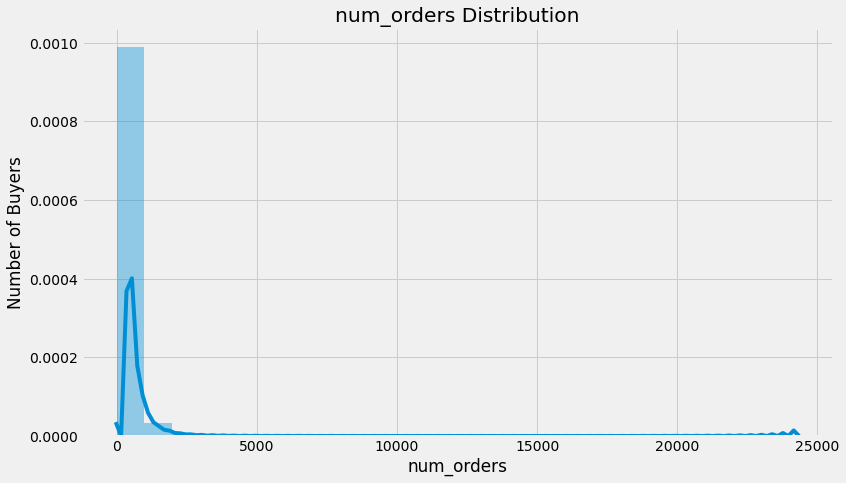

In [29]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,7))
sns.distplot(trainfinal.num_orders, bins = 25)
plt.xlabel("num_orders")
plt.ylabel("Number of Buyers")
plt.title("num_orders Distribution")

## Now we take the reciprocal of the num_order column and check the result

In [30]:
def reciprocal(x):
    y = 1/x
    return y

In [31]:
hehe = reciprocal(trainfinal.num_orders)

In [32]:
import math
def log(x):
    y = math.log(x, 10)
    return y

In [33]:
#haha['numorders'] = log(trainfinal.num_orders)

Text(0.5, 1.0, 'num_orders Distribution')

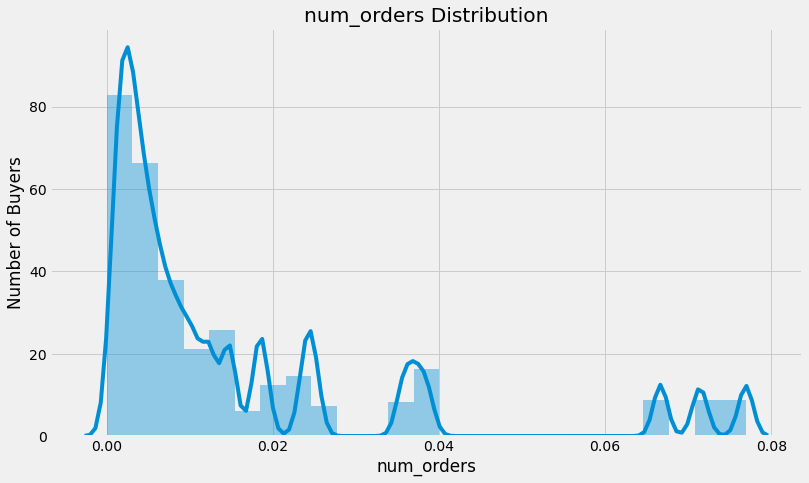

In [34]:
plt.figure(figsize=(12,7))
sns.distplot(hehe, bins = 25)
plt.xlabel("num_orders")
plt.ylabel("Number of Buyers")
plt.title("num_orders Distribution")

In [35]:
trainfinal2 = trainfinal.drop(['id'], axis=1)
correlation = trainfinal2.corr(method='pearson')
columns = correlation.nlargest(8, 'num_orders').index
columns

Index(['num_orders', 'homepage_featured', 'emailer_for_promotion', 'op_area',
       'cuisine', 'city_code', 'region_code', 'category'],
      dtype='object')

## We plot the heat map

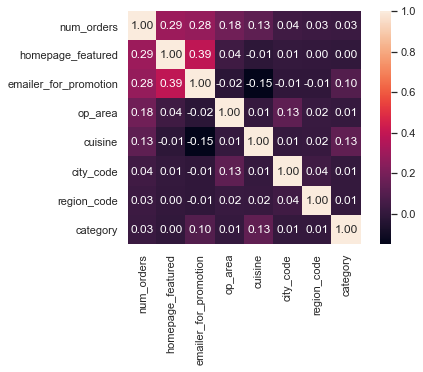

In [36]:
correlation_map = np.corrcoef(trainfinal2[columns].values.T)
sns.set(font_scale=1.0)
heatmap = sns.heatmap(correlation_map, cbar=True, annot=True, square=True, fmt='.2f', yticklabels=columns.values, xticklabels=columns.values)
plt.show()

## Spliting data into training set and test set

In [37]:
features = columns.drop(['num_orders'])
trainfinal3 = trainfinal[features]
X = trainfinal3.values
y = trainfinal['num_orders'].values

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25)

In [38]:
X_train

array([[  0. ,   0. ,   4. , ..., 680. ,  77. ,   7. ],
       [  0. ,   0. ,   4.2, ..., 615. ,  34. ,   6. ],
       [  0. ,   0. ,   7. , ..., 638. ,  56. ,   0. ],
       ...,
       [  0. ,   0. ,   4.5, ..., 473. ,  77. ,   5. ],
       [  0. ,   0. ,   4. , ..., 590. ,  56. ,   0. ],
       [  0. ,   0. ,   3.2, ..., 517. ,  56. ,   5. ]])

In [39]:
y_train

array([ 94,  42, 149, ...,  94, 271, 150], dtype=int64)

In [40]:
trainfinal3.head()

,homepage_featured,emailer_for_promotion,op_area,cuisine,city_code,region_code,category
0,0,0,2.0,3,647,56,0
1,0,0,2.0,3,647,56,0
2,0,0,2.0,3,647,56,0
3,0,0,2.0,3,647,56,0
4,0,0,2.0,3,647,56,0


In [41]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit_transform(X_train)
sc.transform(X_val)
from joblib import dump
dump(sc,"scalar.save")

['scalar.save']

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor

## Linear Regression Model

In [43]:
LR = LinearRegression() 
LR.fit(X_train, y_train) 
y_pred = LR.predict(X_val) 
y_pred[y_pred<0] = 0 
from sklearn import metrics 
print('RMSLE:', 100*np.sqrt(metrics.mean_squared_log_error(y_val, y_pred)))

RMSLE: 129.53584089112343


## Lasso Model

In [44]:
L = Lasso() 
L.fit(X_train, y_train) 
y_pred = L.predict(X_val) 
y_pred[y_pred<0] = 0 
from sklearn import metrics 
print('RMSLE:', 100*np.sqrt(metrics.mean_squared_log_error(y_val, y_pred)))

RMSLE: 129.02016823303


## Elastic Net Model

In [45]:
EN = ElasticNet() 
EN.fit(X_train, y_train) 
y_pred = EN.predict(X_val) 
y_pred[y_pred<0] = 0 
from sklearn import metrics 
print('RMSLE:', 100*np.sqrt(metrics.mean_squared_log_error(y_val, y_pred)))

RMSLE: 130.8442499527564


## Decision Tree Model 

In [46]:
X_train[0]

array([  0.,   0.,   4.,   0., 680.,  77.,   7.])

In [47]:
y_train[0]

94

In [48]:
DT = DecisionTreeRegressor()
DT.fit(X_train, y_train)
y_pred = DT.predict(X_val)
y_pred[y_pred<0] = 0
from sklearn import metrics
print('RMSLE:', 100*np.sqrt(metrics.mean_squared_log_error(y_val, y_pred)))

RMSLE: 62.762763725965485


## Random Forest

In [49]:
from sklearn.ensemble import RandomForestRegressor

In [50]:
rf=RandomForestRegressor(n_estimators=10,random_state=0,n_jobs=-1)
rf.fit(X_train,y_train)

RandomForestRegressor(n_estimators=10, n_jobs=-1, random_state=0)

In [51]:
y_pred = rf.predict(X_val)
y_pred[y_pred<0] = 0
from sklearn import metrics
print('RMSLE:', 100*np.sqrt(metrics.mean_squared_log_error(y_val, y_pred)))

RMSLE: 62.79551838420225


In [52]:
from sklearn.metrics import r2_score
r2_score(y_val,y_pred)

0.6451606362021658

In [53]:
import pickle
pickle.dump(rf,open('random.pkl','wb'))

## KNN Model

In [54]:
KNN = KNeighborsRegressor()
KNN.fit(X_train, y_train)
y_pred = KNN.predict(X_val)
y_pred[y_pred<0] = 0
from sklearn import metrics
print('RMSLE:', 100*np.sqrt(metrics.mean_squared_log_error(y_val, y_pred)))

RMSLE: 67.17724997511682


## Gradient Boost Model

In [55]:
GB = GradientBoostingRegressor() 
GB.fit(X_train, y_train) 
y_pred = GB.predict(X_val) 
y_pred[y_pred<0] = 0 
from sklearn import metrics 
print('RMSLE:', 100*np.sqrt(metrics.mean_squared_log_error(y_val, y_pred)))

RMSLE: 95.13014985913082


## We merge the meal_id and center_id columns to the testfinal set and assign list of all columns to tcols

In [56]:
testfinal = pd.merge(test, meal_info, on="meal_id", how="outer")
testfinal = pd.merge(testfinal, center_info, on="center_id", how="outer")
testfinal = testfinal.drop(['meal_id', 'center_id'], axis=1)

tcols = testfinal.columns.tolist()
print(tcols)

['id', 'week', 'checkout_price', 'base_price', 'emailer_for_promotion', 'homepage_featured', 'category', 'cuisine', 'city_code', 'region_code', 'center_type', 'op_area']


## We now rearrage the order of all the columns and perform Label Encoding to get numerical values 

In [57]:
tcols = tcols[:2] + tcols[8:] + tcols[6:8] + tcols[2:6]
testfinal = testfinal[tcols]

lb1 = LabelEncoder()
testfinal['center_type'] = lb1.fit_transform(testfinal['center_type'])

lb2 = LabelEncoder()
testfinal['category'] = lb1.fit_transform(testfinal['category'])

lb3 = LabelEncoder()
testfinal['cuisine'] = lb1.fit_transform(testfinal['cuisine'])

testfinal.head()


,id,week,city_code,region_code,center_type,op_area,category,cuisine,checkout_price,base_price,emailer_for_promotion,homepage_featured
0,1028232,146,647,56,2,2.0,0,3,158.11,159.11,0,0
1,1262649,147,647,56,2,2.0,0,3,159.11,159.11,0,0
2,1453211,149,647,56,2,2.0,0,3,157.14,158.14,0,0
3,1262599,150,647,56,2,2.0,0,3,159.14,157.14,0,0
4,1495848,151,647,56,2,2.0,0,3,160.11,159.11,0,0


# This is the trainfinal set

In [58]:
trainfinal.head()

,id,week,city_code,region_code,center_type,op_area,category,cuisine,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,647,56,2,2.0,0,3,136.83,152.29,0,0,177
1,1018704,2,647,56,2,2.0,0,3,135.83,152.29,0,0,323
2,1196273,3,647,56,2,2.0,0,3,132.92,133.92,0,0,96
3,1116527,4,647,56,2,2.0,0,3,135.86,134.86,0,0,163
4,1343872,5,647,56,2,2.0,0,3,146.50,147.50,0,0,215


## This is the testfinal set

In [59]:
testfinal.head()

,id,week,city_code,region_code,center_type,op_area,category,cuisine,checkout_price,base_price,emailer_for_promotion,homepage_featured
0,1028232,146,647,56,2,2.0,0,3,158.11,159.11,0,0
1,1262649,147,647,56,2,2.0,0,3,159.11,159.11,0,0
2,1453211,149,647,56,2,2.0,0,3,157.14,158.14,0,0
3,1262599,150,647,56,2,2.0,0,3,159.14,157.14,0,0
4,1495848,151,647,56,2,2.0,0,3,160.11,159.11,0,0


In [60]:
X_test = testfinal[features].values

In [61]:
features

Index(['homepage_featured', 'emailer_for_promotion', 'op_area', 'cuisine',
       'city_code', 'region_code', 'category'],
      dtype='object')

## Now we create the dataframe which has id and num_orders and store in the variable submit

In [62]:
pred = DT.predict(X_test)
pred[pred<0] = 0
submit = pd.DataFrame({
    'id' : testfinal['id'],
    'num_orders' : pred
})

## At last we convert the dataframe to a csv type 

In [63]:
submit.to_csv("submission.csv", index=False)

## This is the data for the customer id and the number of orders which are predicted

In [64]:
submit.describe()

,id,num_orders
count,3.257300e+04,32573.000000
mean,1.248476e+06,262.890145
std,1.441580e+05,364.146718
min,1.000085e+06,15.203390
25%,1.123969e+06,63.622093
50%,1.247296e+06,148.878676
75%,1.372971e+06,321.482490
max,1.499996e+06,5777.200000
